In [2]:
#Importing the neccessary modules & packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# reading the data using pandas 
df_train = pd.read_csv('loan_sanction_train.csv',index_col=0)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test = pd.read_csv('loan_sanction_test1.csv',index_col=0)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,1
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,1
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,1
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,1
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,1


In [4]:
#checking the count of null data in the current dataset 
print(df_train.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
print(df_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [6]:
df_train["Gender"].fillna("Unknown", inplace = True)
df_train["Self_Employed"].fillna("Unknown", inplace = True)
df_train["Dependents"] = df_train["Dependents"].replace('3+',3)
df_train["Married"].fillna("Unknown", inplace = True)

df_test["Gender"].fillna("Unknown", inplace = True)
df_test["Self_Employed"].fillna("Unknown", inplace = True)
df_test["Dependents"] = df_test["Dependents"].replace('3+',3)
df_test["Married"].fillna("Unknown", inplace = True)

In [7]:
print(df_train.isnull().sum())

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_train["Dependents"] = imp.fit_transform(df_train[["Dependents"]]).ravel()
df_train["LoanAmount"] = imp.fit_transform(df_train[["LoanAmount"]]).ravel()
df_train["Loan_Amount_Term"] = imp.fit_transform(df_train[["Loan_Amount_Term"]]).ravel()
df_train["Credit_History"] = imp.fit_transform(df_train[["Credit_History"]]).ravel()

In [9]:
#rechecking the count of null data in the current dataset 
print(df_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_test["Dependents"] = imp.fit_transform(df_test[["Dependents"]]).ravel()
df_test["LoanAmount"] = imp.fit_transform(df_test[["LoanAmount"]]).ravel()
df_test["Loan_Amount_Term"] = imp.fit_transform(df_test[["Loan_Amount_Term"]]).ravel()
df_test["Credit_History"] = imp.fit_transform(df_test[["Credit_History"]]).ravel()

In [11]:
print(df_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [12]:
df_train = df_train.astype({"Dependents":'float', "ApplicantIncome":'float', "CoapplicantIncome":'float', "LoanAmount":'float', "Loan_Amount_Term":'float', "Credit_History":'float'})
df_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df_test = df_test.astype({"Dependents":'float', "ApplicantIncome":'float', "CoapplicantIncome":'float', "LoanAmount":'float', "Loan_Amount_Term":'float', "Credit_History":'float'})
df_test.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

Dependents


<Figure size 600x300 with 0 Axes>

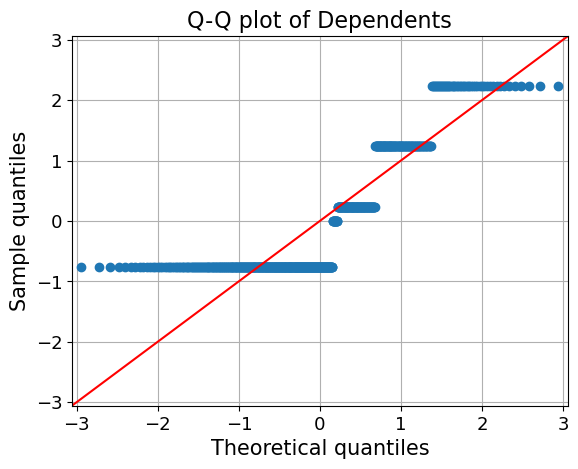

ApplicantIncome


<Figure size 600x300 with 0 Axes>

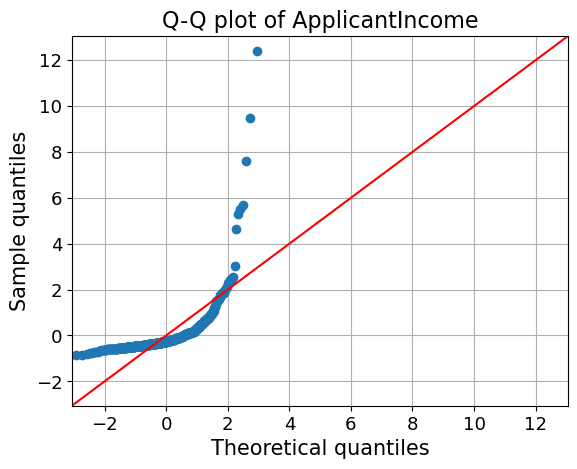

CoapplicantIncome


<Figure size 600x300 with 0 Axes>

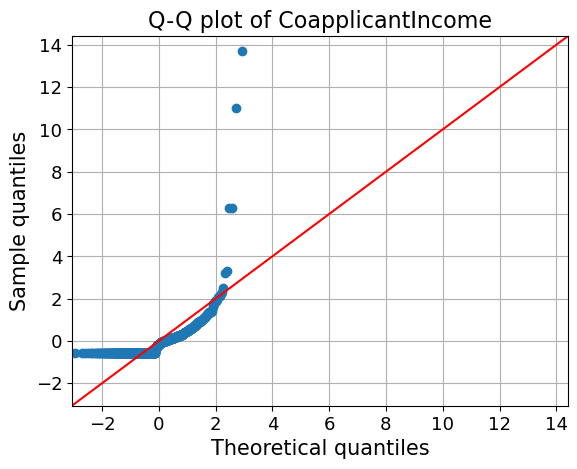

LoanAmount


<Figure size 600x300 with 0 Axes>

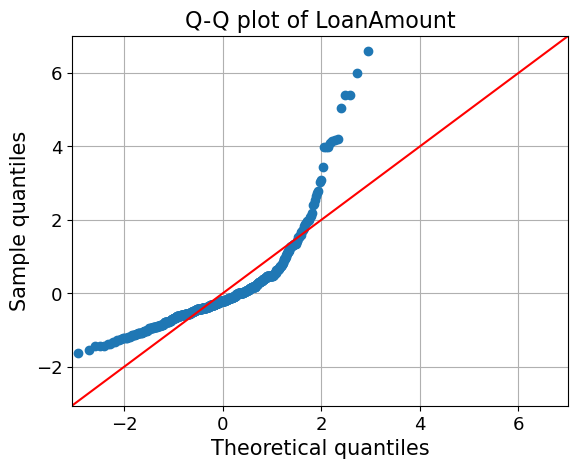

Loan_Amount_Term


<Figure size 600x300 with 0 Axes>

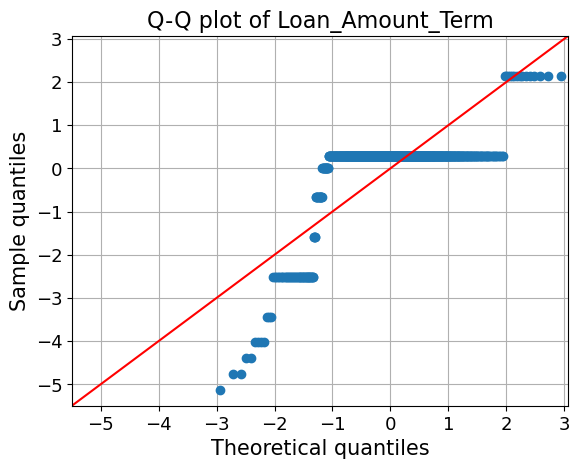

Credit_History


<Figure size 600x300 with 0 Axes>

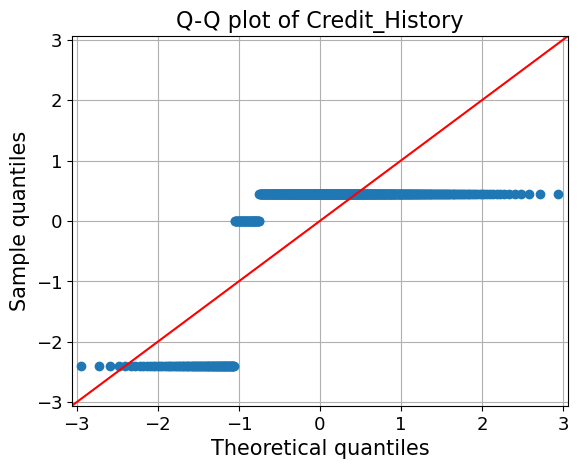

In [14]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df_train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(6,3))
  print(c)
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

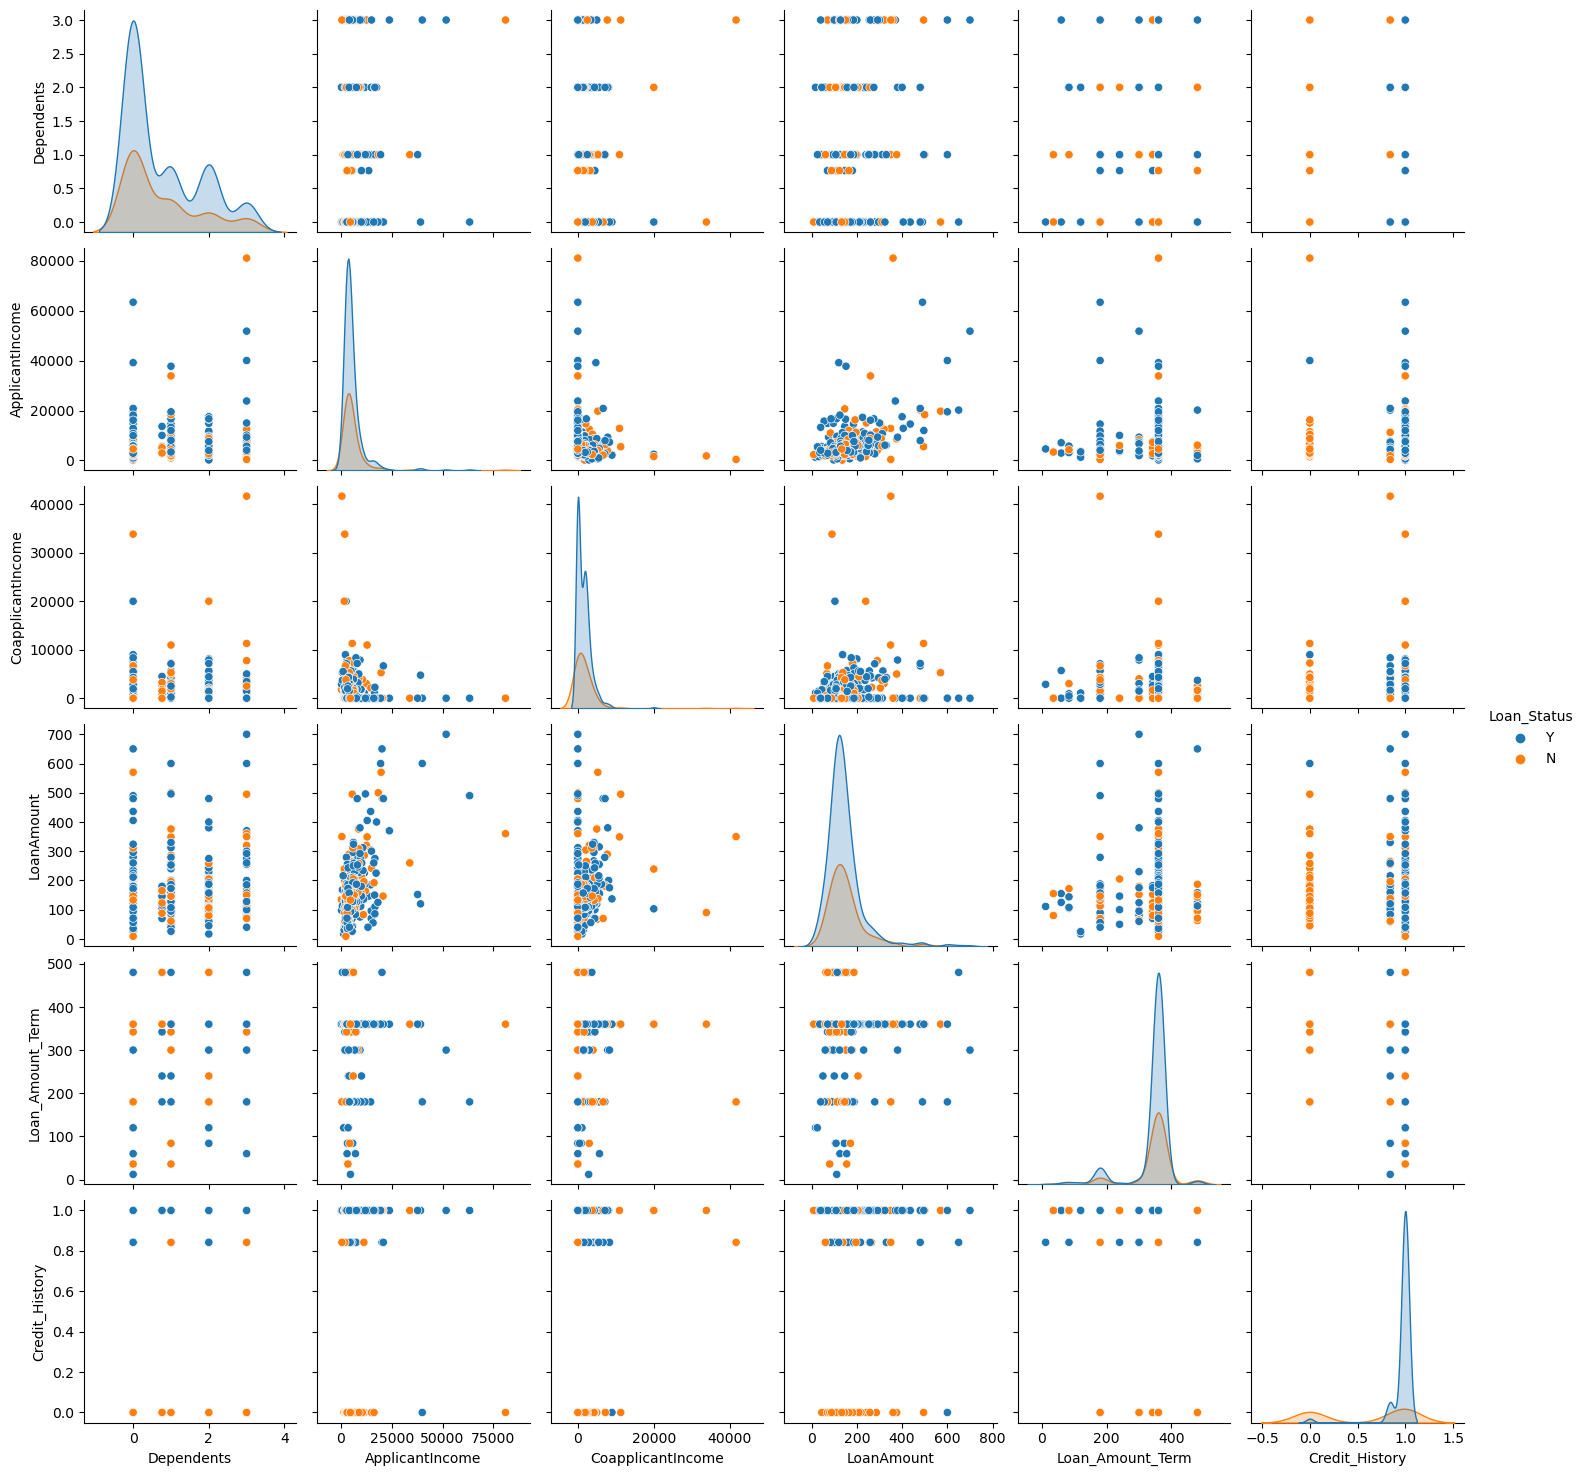

In [15]:
#overall relationship plot
import seaborn as sns
sns.pairplot(data=df_train,hue='Loan_Status')
plt.show()

In [16]:
#Data visualization columns preparation
num_cols=df_train.select_dtypes([np.number]).columns
print(num_cols)
cat_cols=df_train.select_dtypes('object').drop(['Loan_Status'],axis=1).columns
print(cat_cols)

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')


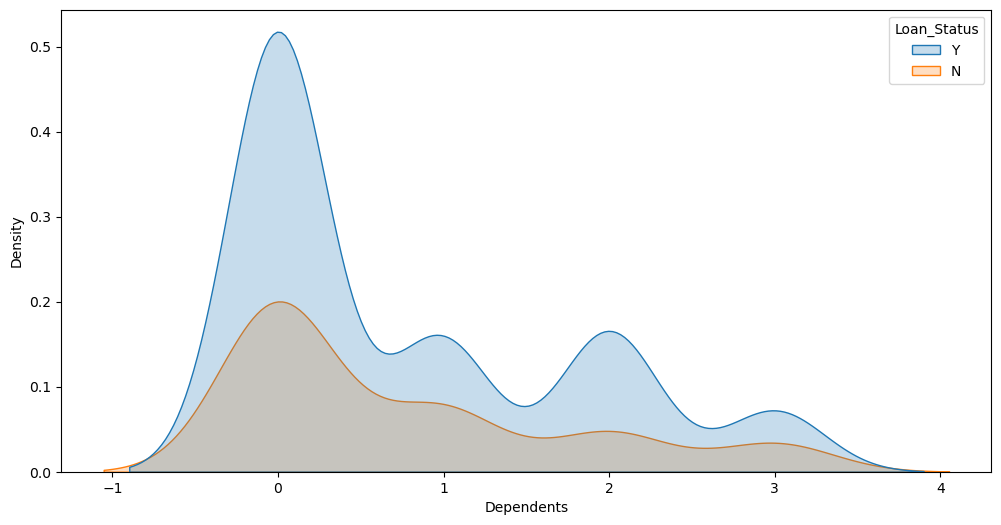

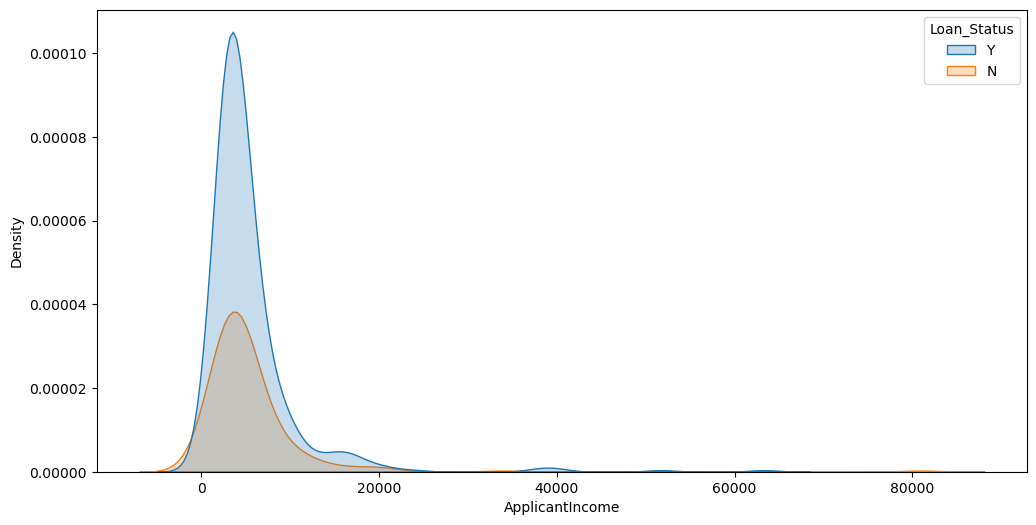

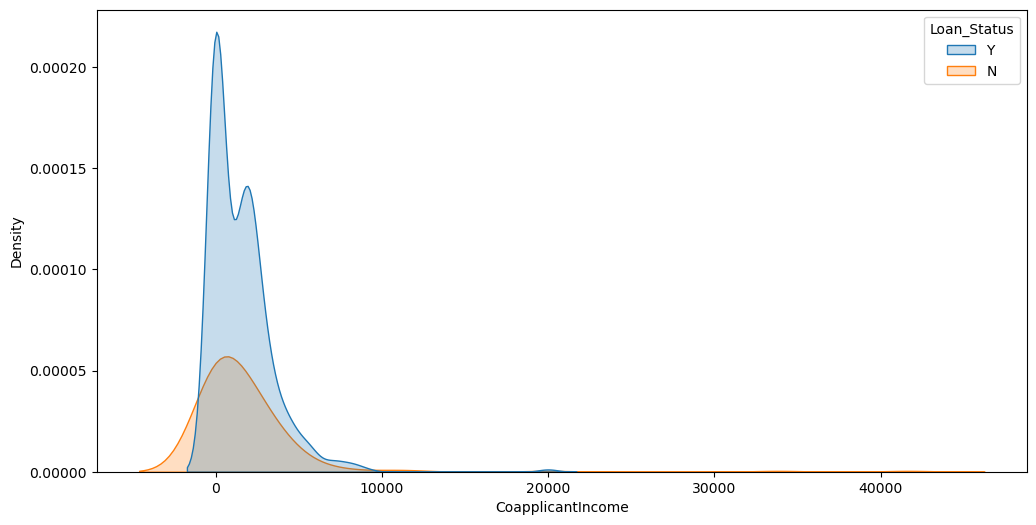

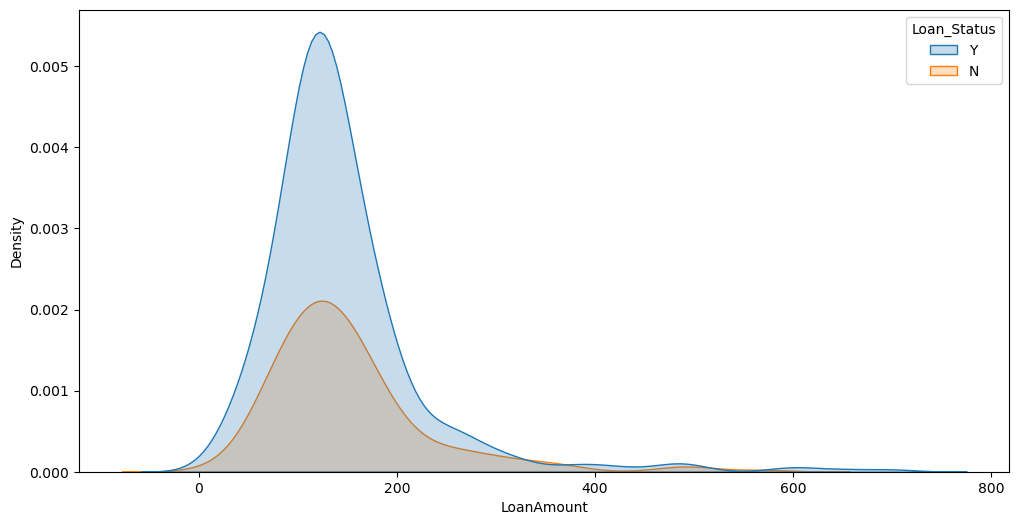

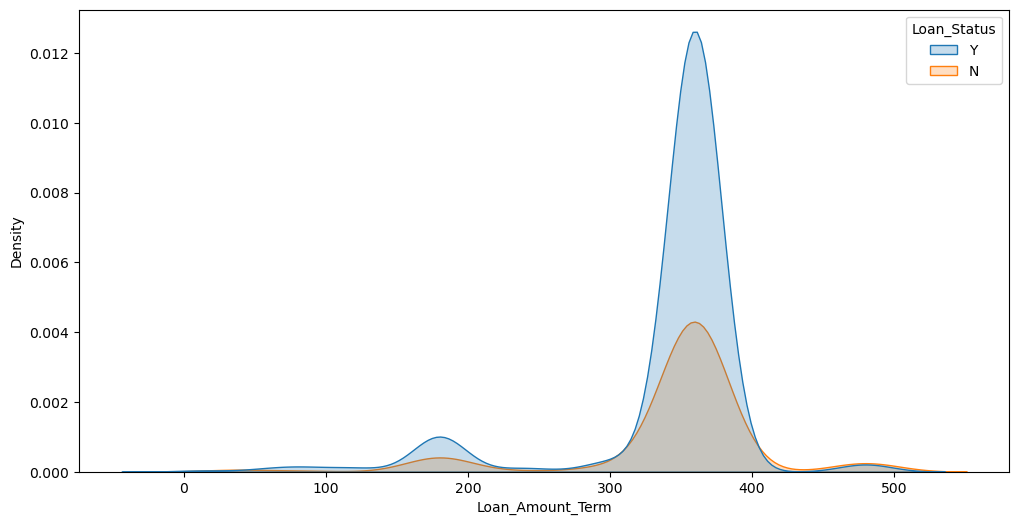

In [17]:
#Plots to analyse the relationship between numerical features and Loan status
for col in num_cols:
    if col=='Credit_History':
        continue
    plt.figure(figsize=(12,6))
    sns.kdeplot(data=df_train,x=col,hue='Loan_Status',shade=True)
    plt.show()

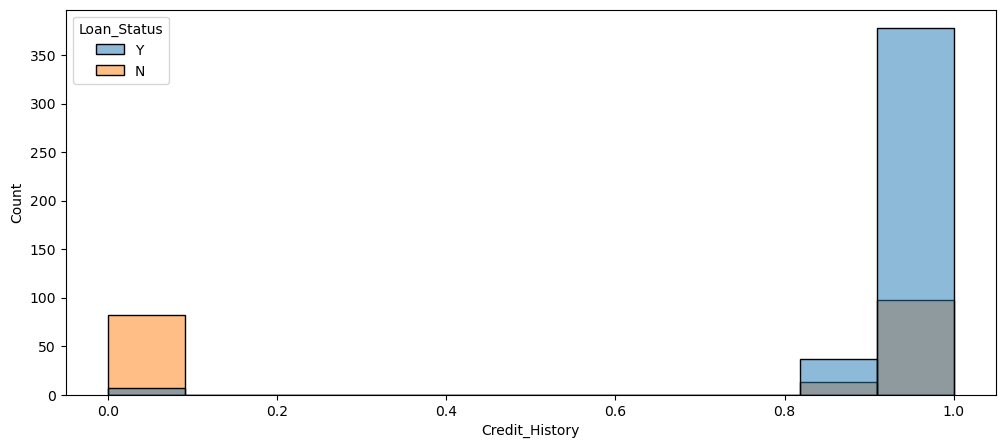

In [18]:
#Relationship between credit history and loan status
plt.figure(figsize=(12,5))
sns.histplot(data=df_train,x='Credit_History',hue='Loan_Status')
plt.show()

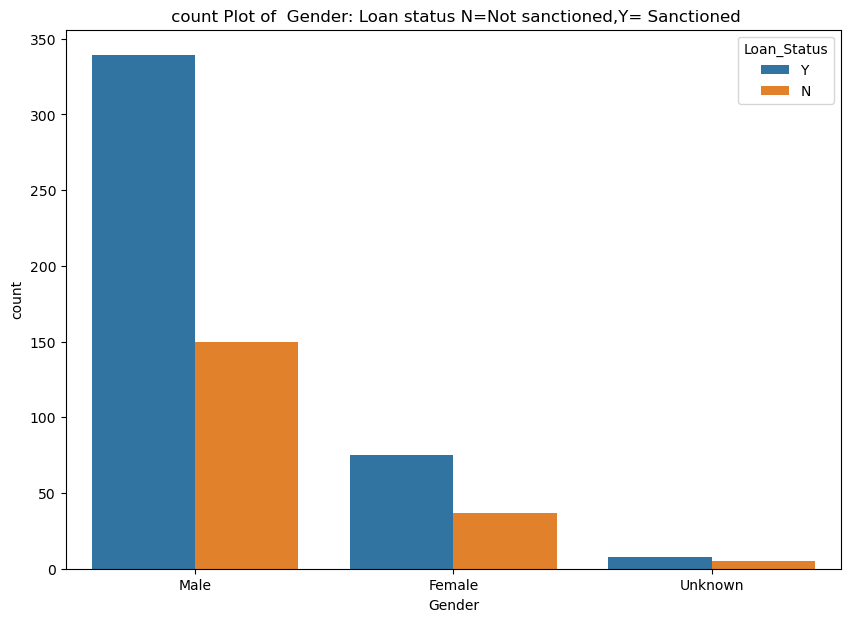

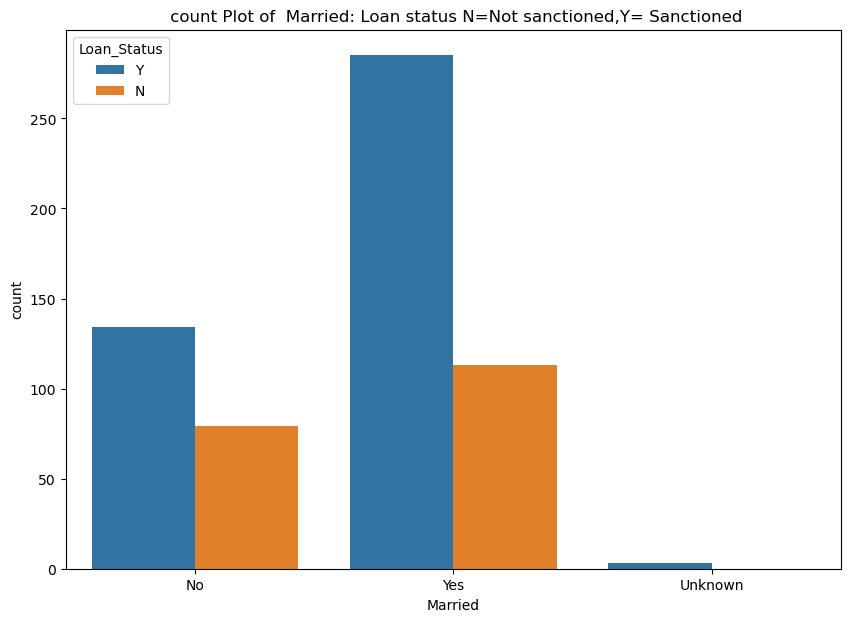

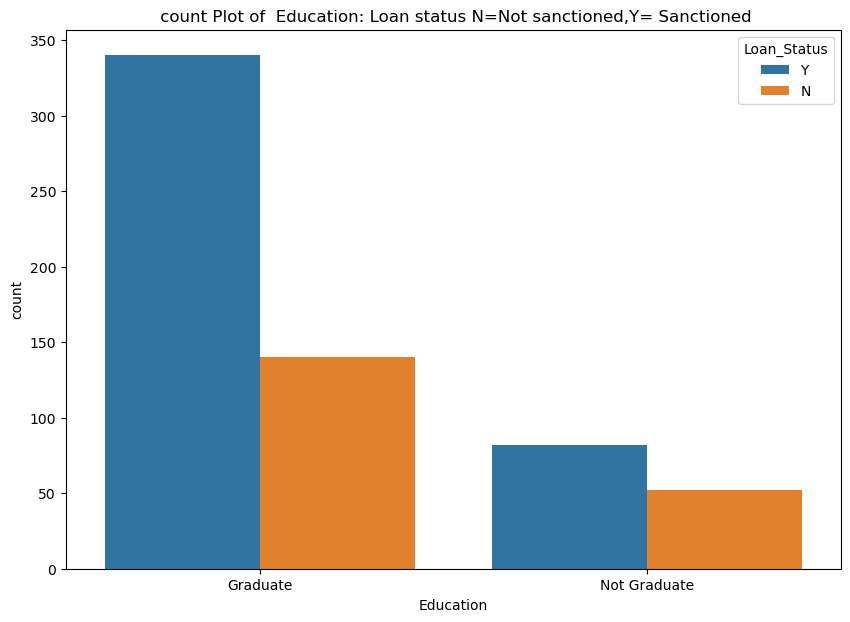

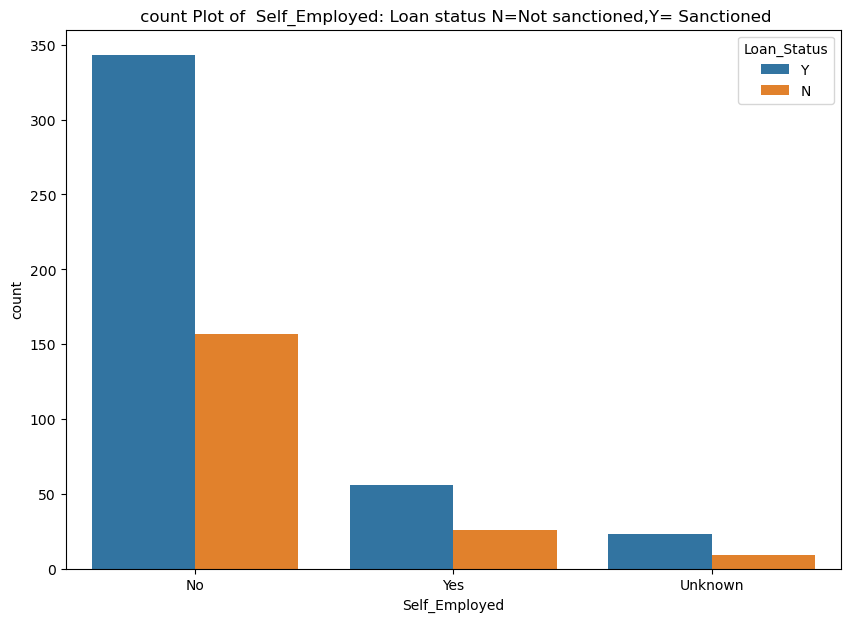

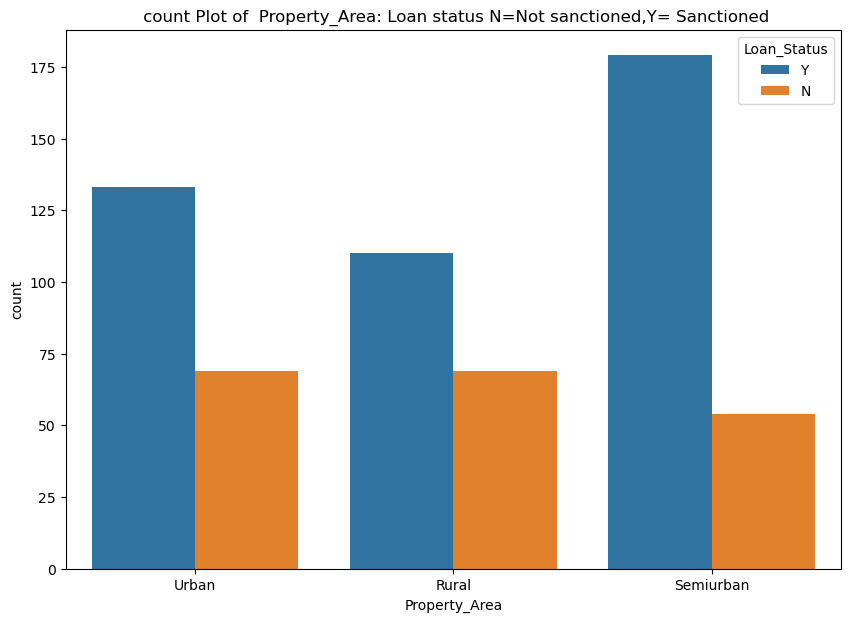

In [19]:
#analysing relationship among categorical variables and applicant income with Loan status
for col in cat_cols:
    plt.figure(figsize=(10,7))
    sns.countplot(data=df_train,x=col,hue='Loan_Status',)
    plt.title(' count Plot of  '+col+': Loan status N=Not sanctioned,Y= Sanctioned')
    plt.show()

In [20]:
original_length_train = df_train.shape[0]    #length of dataset before deleting the data
print(f'Length of DataFrame: {df_train.shape[0]}')  #length of dataset
print(f'Width of DataFrame: {df_train.shape[1]}')   #width of dataset

Length of DataFrame: 614
Width of DataFrame: 12


In [21]:
original_length_test = df_test.shape[0]    #length of dataset before deleting the data
print(f'Length of DataFrame: {df_test.shape[0]}')  #length of dataset
print(f'Width of DataFrame: {df_test.shape[1]}')   #width of dataset

Length of DataFrame: 367
Width of DataFrame: 12


In [22]:
X_train = df_train.iloc[:, :-1].values # from column 1 to second last column[-1] means dropping id and satisfaction column
y_train = df_train.iloc[:, -1].values # -1 indicates last column

In [23]:
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:, -1].values

In [24]:
# Printing the first row in dataset
print(X_train[0])
print(len(X_train[0]))

['Male' 'No' 0.0 'Graduate' 'No' 5849.0 0.0 146.41216216216216 360.0 1.0
 'Urban']
11


In [25]:
print(X_test[0])
print(len(X_test[0]))

['Male' 'Yes' 0.0 'Graduate' 'No' 5720.0 0.0 110.0 360.0 1.0 'Urban']
11


In [26]:
# Printing the outcome of the first row
print(y_train[0])

Y


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,10])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [29]:
print(X_train[0])
print(len(X_train[0]))

[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 5849.0 0.0
 146.41216216216216 360.0 1.0]
20


In [30]:
print(X_test[0])
print(len(X_test[0]))

[0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 5720.0 0.0
 110.0 360.0 1.0]
20


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(6), object(6)
memory usage: 78.5+ KB


In [32]:
# Here the y_true value is a string[neutral or dissatisfied/ satisfied] and not an integer[0,1] hence we need to encode it. This step can be avoided if your y_true is in integer form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [33]:
print(y_train[0])

1


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,11:] = sc.fit_transform(X_train[:,11:])
X_test[:,11:] = sc.fit_transform(X_test[:,11:])

In [35]:
#printing the first value of X_train after scaling
print(X_train[0])

[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 -0.641478178018207
 -0.7820157008848616 1.4281470373865746 -0.7614902772486241
 0.0729908228506884 -0.5544873301529847 3.3847857674402117e-16
 0.27985054320228187 0.4516404506660835]


In [36]:
#printing the first value of X_test after scaling
print(X_test[0])

[0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 -0.6584783595532965
 -0.6798171772045121 1.2733532783279644 -0.7858136221332582
 0.18646050388801308 -0.6733351095163023 -0.42936789137766446
 0.27060267228275536 0.47917989295064234]


In [37]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

In [38]:
print(len(X_test[0]))
print(len(X_train[0]))

20
20


In [39]:
# Creating a skeleton of model.
from keras.models import Sequential
# Defining layers
from keras.layers import Input, Dense
import tensorflow as tf

In [40]:
# Input neurons
input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5
# Defining the architecture of the model
model = Sequential()
model.add(Dense(units=neuron_hidden_layer_1, input_shape=(input_neurons,), activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
model_history = model.fit(X_train, y_train, epochs = 50, callbacks=[tb_callback])

Epoch 1/50
20/20 [==============================] - 2s 20ms/step - loss: 0.6476 - accuracy: 0.6384
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6316 - accuracy: 0.6645
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.6840
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.7036
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5917 - accuracy: 0.7215
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.7280
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.7410
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7524
Epoch 9/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.7524
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5461 - accuracy: 0.7622
Epoch 11/50
20/20 

In [43]:
# Getting predictions for the test set
prediction_probs = model.predict(X_test)
# Convert predicted probabilities to binary predictions
prediction = (prediction_probs > 0.5).astype('float64')
# Getting accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy_Score : {}".format(accuracy_score(prediction, y_test) * 100))


12/12 [==============================] - 0s 3ms/step
Accuracy_Score : 98.9100817438692


In [46]:
%reload_ext tensorboard
%tensorboard --logdir logs/